In [1]:
# Librerías
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from io import BytesIO
from PIL import Image
%matplotlib notebook
%matplotlib inline

C:\Users\a-sal\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# (a)

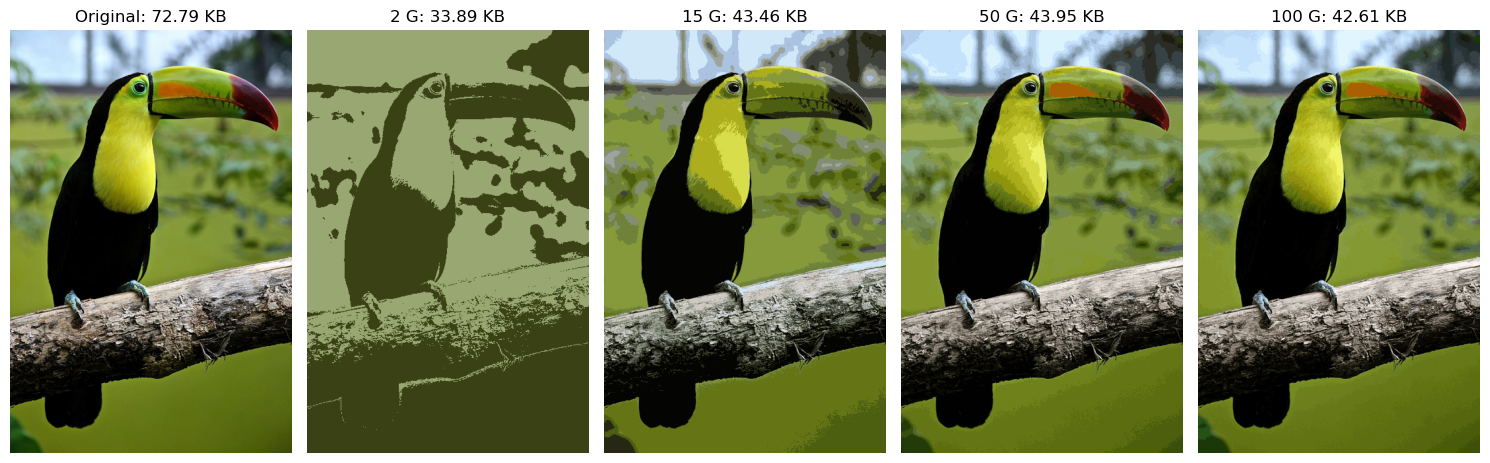

In [4]:
##### se importa la imagen
im = mpl.image.imread("pictures/tucan.jpg")#cv2.cvtColor(cv2.imread("C:/Users/a-sal/Documents/Cimat_semestres/Segundo semestre/Ciencia de datos/Tareas/Tarea 2/pictures/tucan.jpg"),cv2.COLOR_BGR2RGB)

##### función para aplicar k-means a las imagenes 
def km(im, n_c):
    im_ = im.reshape(-1,3)/255
    kmeans = KMeans(n_clusters = n_c, n_init = 10) 
    kmeans.fit(im_)
    segmented_im = kmeans.cluster_centers_[kmeans.labels_]
    segmented_im = segmented_im.reshape(640, 427, 3)
    return segmented_im
     
##### se realiza k-means a la imagen con distintos grupos
# 15 grupos
tucan_km_2 = km(im, 2) 
# 15 grupos
tucan_km_15 = km(im, 15) 
# 50 grupos
tucan_km_50 = km(im, 50) 
# 100 grupos
tucan_km_100 = km(im, 100) 


##### se guardan las imagenes reconstruidas
# 2 grupos 
ruta_guardado_reconstruida = 'pictures/tucan_km_2.jpg' 
image_reconstructed_pillow = Image.fromarray((tucan_km_2 * 255).astype(np.uint8))
image_reconstructed_pillow.save(ruta_guardado_reconstruida, format='JPEG')
img_r = cv2.cvtColor(cv2.imread("pictures/tucan_km_2.jpg"),cv2.COLOR_BGR2RGB)

# 15 grupos
ruta_guardado_reconstruida = 'pictures/tucan_km_15.jpg' 
image_reconstructed_pillow = Image.fromarray((tucan_km_15 * 255).astype(np.uint8))
image_reconstructed_pillow.save(ruta_guardado_reconstruida, format='JPEG')
img_r = cv2.cvtColor(cv2.imread("pictures/tucan_km_15.jpg"),cv2.COLOR_BGR2RGB)

# 50 grupos 
ruta_guardado_reconstruida = 'pictures/tucan_km_50.jpg' 
image_reconstructed_pillow = Image.fromarray((tucan_km_50 * 255).astype(np.uint8))
image_reconstructed_pillow.save(ruta_guardado_reconstruida, format='JPEG')
img_r = cv2.cvtColor(cv2.imread("pictures/tucan_km_50.jpg"),cv2.COLOR_BGR2RGB)

# 100 grupos 
ruta_guardado_reconstruida = 'pictures/tucan_km_100.jpg' 
image_reconstructed_pillow = Image.fromarray((tucan_km_100 * 255).astype(np.uint8))
image_reconstructed_pillow.save(ruta_guardado_reconstruida, format='JPEG')
img_r = cv2.cvtColor(cv2.imread("pictures/tucan_km_100.jpg"),cv2.COLOR_BGR2RGB)

##### se obtiene el peso de las imagenes 
# original
tamano = os.path.getsize("pictures/tucan.jpg")
tamano_kb = tamano / 1024

# 2 grupos
tamano_2 = os.path.getsize("pictures/tucan_km_2.jpg")
tamano_kb_2 = tamano_2 / 1024

# 15 grupos
tamano_15 = os.path.getsize("pictures/tucan_km_15.jpg")
tamano_kb_15 = tamano_15 / 1024

# 50 grupos
tamano_50 = os.path.getsize("pictures/tucan_km_50.jpg")
tamano_kb_50 = tamano_50 / 1024

# 100 grupos
tamano_100 = os.path.getsize("pictures/tucan_km_100.jpg")
tamano_kb_100 = tamano_100 / 1024


# se imprimen las figuras de acuerdo a las componentes con que se reducieron
plt.figure(figsize=(15,10))
plt.subplot(1,5,1); plt.imshow(im); plt.axis('off'); plt.title(f"Original: {tamano_kb:.2f} KB")
plt.subplot(1,5,2); plt.imshow(tucan_km_2); plt.axis('off'); plt.title(f"2 G: {tamano_kb_2:.2f} KB")
plt.subplot(1,5,3); plt.imshow(tucan_km_15); plt.axis('off'); plt.title(f"15 G: {tamano_kb_15:.2f} KB")
plt.subplot(1,5,4); plt.imshow(tucan_km_50); plt.axis('off'); plt.title(f"50 G: {tamano_kb_50:.2f} KB")
plt.subplot(1,5,5); plt.imshow(tucan_km_100); plt.axis('off'); plt.title(f"100 G: {tamano_kb_100:.2f} KB")

plt.tight_layout()
plt.show()


# (b)

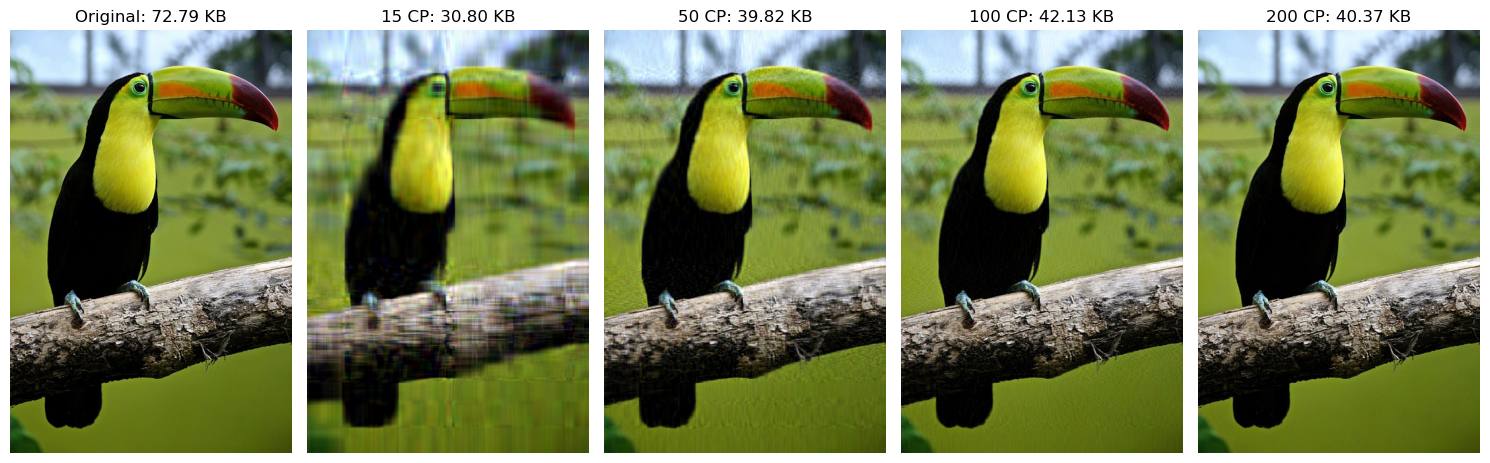

In [288]:
# se importa la imagen
img = cv2.cvtColor(cv2.imread("pictures/tucan.jpg"),cv2.COLOR_BGR2RGB)

# se descompone la imagen en los canales 
r, g, b = cv2.split(img)

"""
plt.figure(figsize=(9,3))
plt.subplot(1,3,1); plt.imshow(r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channels
"""
# se normalizan los canales
ch_r, ch_g, ch_b = r / 255, g / 255, b / 255

#######################################################################################
# número de componentes
pca_components = 15 

# transformación de los datos usando PCA
pca_r = PCA(n_components = pca_components)
reduced_r = pca_r.fit_transform(ch_r)

pca_g = PCA(n_components = pca_components)
reduced_g = pca_g.fit_transform(ch_g)

pca_b = PCA(n_components = pca_components)
reduced_b = pca_b.fit_transform(ch_b)

# reconstrucciónd de las imagenes
reconstructed_r = pca_r.inverse_transform(reduced_r) 
reconstructed_g = pca_g.inverse_transform(reduced_g) 
reconstructed_b = pca_b.inverse_transform(reduced_b) 
img_reconstructed_15 = (cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b)))

# Ajustar los valores al rango [0, 1]
img_reconstructed_15 = np.clip(img_reconstructed_15, 0, 1)

# Guardar la imagen reconstruida
ruta_guardado_reconstruida = 'pictures/tucan_15.jpg' 
image_reconstructed_pillow = Image.fromarray((img_reconstructed_15 * 255).astype(np.uint8))
image_reconstructed_pillow.save(ruta_guardado_reconstruida, format='JPEG')
img_r = cv2.cvtColor(cv2.imread("pictures/tucan_15.jpg"),cv2.COLOR_BGR2RGB)

# tamaño de la imagen reconstruida 
tamano_15 = os.path.getsize("pictures/tucan_15.jpg")
tamano_kb_15 = tamano_15 / 1024

#######################################################################################
# número de componentes
pca_components = 50 

# transformación de los datos usando PCA
pca_r = PCA(n_components = pca_components)
reduced_r = pca_r.fit_transform(ch_r)

pca_g = PCA(n_components = pca_components)
reduced_g = pca_g.fit_transform(ch_g)

pca_b = PCA(n_components = pca_components)
reduced_b = pca_b.fit_transform(ch_b)

# reconstrucciónd de las imagenes
reconstructed_r = pca_r.inverse_transform(reduced_r) 
reconstructed_g = pca_g.inverse_transform(reduced_g) 
reconstructed_b = pca_b.inverse_transform(reduced_b) 
img_reconstructed_50 = (cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b)))

# Ajustar los valores al rango [0, 1]
img_reconstructed_50 = np.clip(img_reconstructed_50, 0, 1)

# Guardar la imagen reconstruida
ruta_guardado_reconstruida = 'pictures/tucan_50.jpg' 
image_reconstructed_pillow = Image.fromarray((img_reconstructed_50 * 255).astype(np.uint8))
image_reconstructed_pillow.save(ruta_guardado_reconstruida, format='JPEG')
img_r = cv2.cvtColor(cv2.imread("pictures/tucan_50.jpg"),cv2.COLOR_BGR2RGB)

# tamaño de la imagen reconstruida 
tamano_50 = os.path.getsize("pictures/tucan_50.jpg")
tamano_kb_50 = tamano_50 / 1024

#######################################################################################
# número de componentes
pca_components = 100 

# transformación de los datos usando PCA
pca_r = PCA(n_components = pca_components)
reduced_r = pca_r.fit_transform(ch_r)

pca_g = PCA(n_components = pca_components)
reduced_g = pca_g.fit_transform(ch_g)

pca_b = PCA(n_components = pca_components)
reduced_b = pca_b.fit_transform(ch_b)

# reconstrucciónd de las imagenes
reconstructed_r = pca_r.inverse_transform(reduced_r) 
reconstructed_g = pca_g.inverse_transform(reduced_g) 
reconstructed_b = pca_b.inverse_transform(reduced_b) 
img_reconstructed_100 = (cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b)))

# Ajustar los valores al rango [0, 1]
img_reconstructed_100 = np.clip(img_reconstructed_100, 0, 1)

# Guardar la imagen reconstruida
ruta_guardado_reconstruida = 'pictures/tucan_100.jpg' 
image_reconstructed_pillow = Image.fromarray((img_reconstructed_100 * 255).astype(np.uint8))
image_reconstructed_pillow.save(ruta_guardado_reconstruida, format='JPEG')
img_r = cv2.cvtColor(cv2.imread("pictures/tucan_100.jpg"),cv2.COLOR_BGR2RGB)

# tamaño de la imagen reconstruida 
tamano_100 = os.path.getsize("pictures/tucan_100.jpg")
tamano_kb_100 = tamano_100 / 1024

#######################################################################################
# número de componentes
pca_components = 200 

# transformación de los datos usando PCA
pca_r = PCA(n_components = pca_components)
reduced_r = pca_r.fit_transform(ch_r)

pca_g = PCA(n_components = pca_components)
reduced_g = pca_g.fit_transform(ch_g)

pca_b = PCA(n_components = pca_components)
reduced_b = pca_b.fit_transform(ch_b)

# reconstrucción de las imagenes
reconstructed_r = pca_r.inverse_transform(reduced_r) 
reconstructed_g = pca_g.inverse_transform(reduced_g) 
reconstructed_b = pca_b.inverse_transform(reduced_b) 
img_reconstructed_200 = (cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b)))

# Ajustar los valores al rango [0, 1]
img_reconstructed_200 = np.clip(img_reconstructed, 0, 1)

# Guardar la imagen reconstruida
ruta_guardado_reconstruida = 'pictures/tucan_200.jpg' 
image_reconstructed_pillow = Image.fromarray((img_reconstructed_200 * 255).astype(np.uint8))
image_reconstructed_pillow.save(ruta_guardado_reconstruida, format='JPEG')
img_r = cv2.cvtColor(cv2.imread("pictures/tucan_200.jpg"),cv2.COLOR_BGR2RGB)

# tamaño de la imagen reconstruida 
tamano_200 = os.path.getsize("pictures/tucan_200.jpg")
tamano_kb_200 = tamano_bytes / 1024

# tamaño de la imagen original
tamano = os.path.getsize("pictures/tucan.jpg")
tamano_kb = tamano / 1024

# se imprimen las figuras de acuerdo a las componentes con que se reducieron
plt.figure(figsize=(15,10))
plt.subplot(1,5,1); plt.imshow(img); plt.axis('off'); plt.title(f"Original: {tamano_kb:.2f} KB")
plt.subplot(1,5,2); plt.imshow(img_reconstructed_15); plt.axis('off'); plt.title(f"15 CP: {tamano_kb_15:.2f} KB")
plt.subplot(1,5,3); plt.imshow(img_reconstructed_50); plt.axis('off'); plt.title(f"50 CP: {tamano_kb_50:.2f} KB")
plt.subplot(1,5,4); plt.imshow(img_reconstructed_100); plt.axis('off'); plt.title(f"100 CP: {tamano_kb_100:.2f} KB")
plt.subplot(1,5,5); plt.imshow(img_reconstructed_200); plt.axis('off'); plt.title(f"200 CP: {tamano_kb_200:.2f} KB")
plt.tight_layout()
plt.show()